In [17]:
# Importing necessary libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [18]:
#loading the datase
df=pd.read_csv('loan_prediction1.csv')

In [19]:
#printing the first five dataset
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# EXPLORATORY DATA ANALYSIS

In [20]:
#number of rows and column
df.shape

(614, 13)

In [21]:
#statistical measure
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [22]:
#number of missing value in each
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [23]:
#dropping the column
df=df.dropna()

In [24]:
#number of missing value in each
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [27]:
#label encoding
df.replace({"Loan_Status": {'N': 0, 'Y': 1}}, inplace=True)


In [28]:
#printing the first five dataset
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [29]:
#Dependent column values
df['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [31]:
#replacing the value of 3+ to 4
df=df.replace(to_replace='3+', value=4)

In [32]:
#Dependent column values
df['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

# Data Visualization

<Axes: xlabel='Education', ylabel='count'>

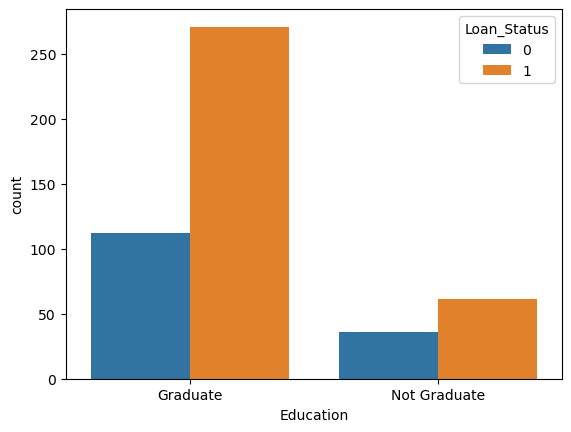

In [33]:
#education & loan status
sns.countplot(x='Education',hue='Loan_Status',data=df)

<Axes: xlabel='Married', ylabel='count'>

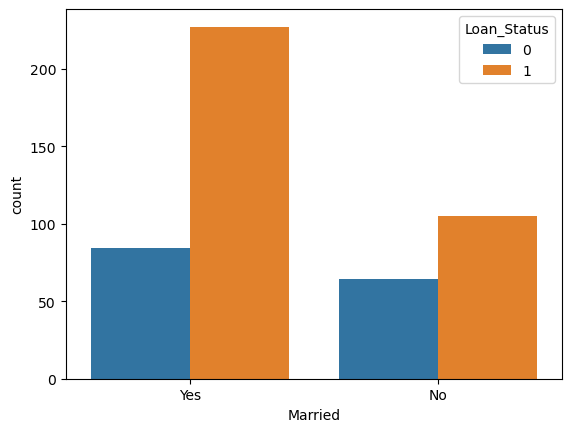

In [34]:
#martial status & loan status
sns.countplot(x='Married',hue='Loan_Status',data=df)

<Axes: xlabel='Gender', ylabel='count'>

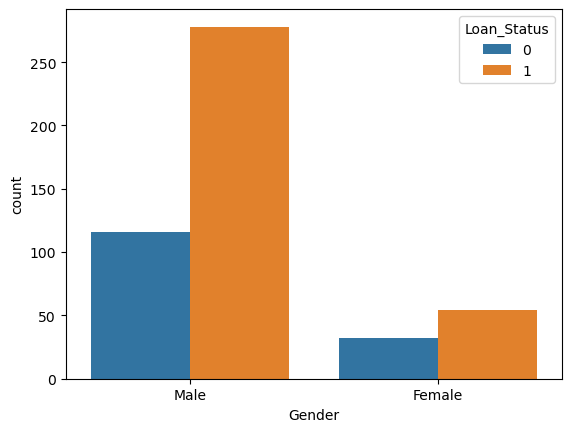

In [35]:
#gender & loan status
sns.countplot(x='Gender',hue='Loan_Status',data=df)

<Axes: xlabel='Property_Area', ylabel='count'>

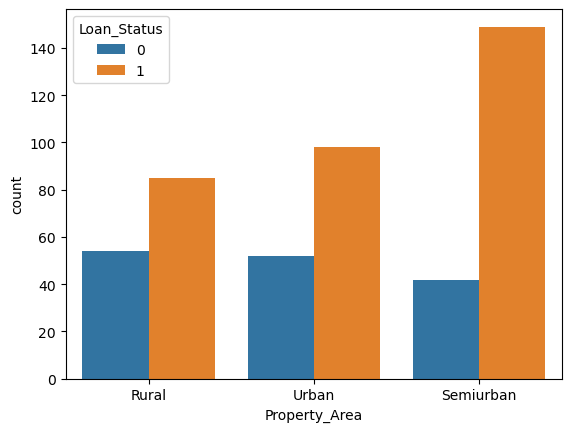

In [36]:
#property area & loan status
sns.countplot(x='Property_Area',hue='Loan_Status',data=df)

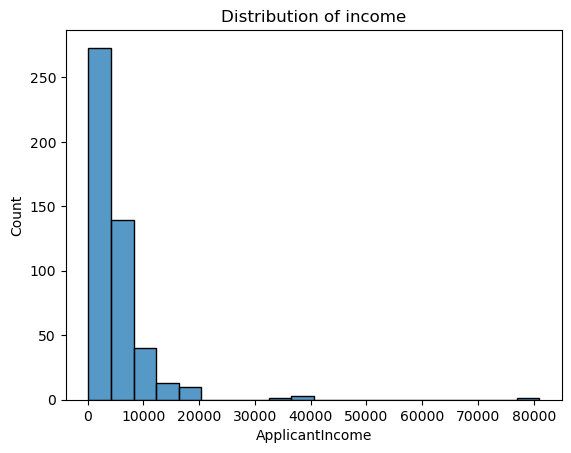

In [55]:
# Visualize the distribution of income
sns.histplot(df['ApplicantIncome'], bins=20)
plt.xlabel('ApplicantIncome')
plt.ylabel('Count')
plt.title('Distribution of income')
plt.show()

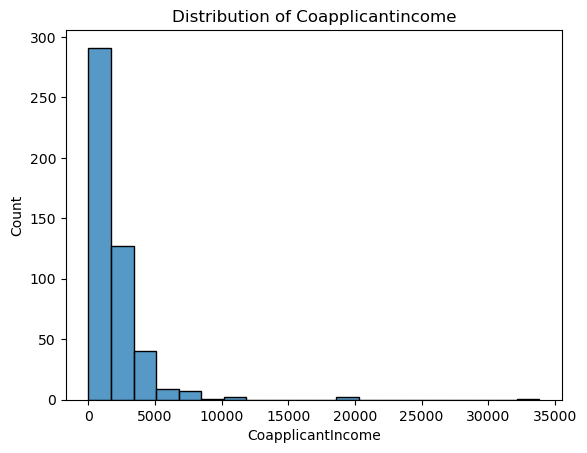

In [57]:
# Visualize the distribution of income
sns.histplot(df['CoapplicantIncome'], bins=20)
plt.xlabel('CoapplicantIncome')
plt.ylabel('Count')
plt.title('Distribution of Coapplicantincome')
plt.show()

In [63]:
#convert categorical column to numerical column
df.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':1},'Self_Employed':{'No':0,'Yes':1},'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [64]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [39]:
#separating the data and label
X=df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
Y=df['Loan_Status']

In [40]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       1        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       1        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

Train Test split

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1,stratify=Y,random_state=2)

In [42]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


Training the model: Support Vector Machine Model

In [43]:
classifier=svm.SVC(kernel='linear')

In [44]:
#training the support vector machine model
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [45]:
from sklearn.svm import SVC

# Instantiate the SVM classifier
classifier = SVC()

# Train the SVM model
classifier.fit(X_train, Y_train)


SVC()

Model evaluation


In [46]:
#ACCURACY SCORE ON TRAINING DATA
X_train_prediction=classifier.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [47]:
print('Accuracy on training data :',training_data_accuracy)

Accuracy on training data : 0.7013888888888888


In [48]:
#ACCURACY SCORE ON TRAINING DATA
X_test_prediction=classifier.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [49]:
print('Accuracy on test data :',test_data_accuracy)

Accuracy on test data : 0.6875
